<a href="https://colab.research.google.com/github/2303A52105/AIML_2303A52105/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Implement the K Nearest Neighbor Classification using Classified Manufacturing Dataset(Student Performance)**

 **Part 1 Import the required Python, Pandas, Matplotlib, Seaborn packages**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


 1. Load the classified dataset into a dataframe using pandas

In [8]:
df = pd.read_csv('/content/student_performance.csv')


 2. Check the data types of each feature(column) in the dataset.

In [9]:
print(df.dtypes)


StudentID                     int64
Name                         object
Gender                       object
AttendanceRate                int64
StudyHoursPerWeek             int64
PreviousGrade                 int64
ExtracurricularActivities     int64
ParentalSupport              object
FinalGrade                    int64
dtype: object


3. Generate a summary of the dataset for min, max, stddev,
 quartile vales for 25%,50%,75%,90%,

In [4]:
summary = df.describe(percentiles=[.25, .5, .75, .90])
print(summary)


       StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   10.00000       10.000000          10.000000      10.000000   
mean     5.50000       85.600000          17.700000      78.100000   
std      3.02765        7.441625           6.848357      10.170218   
min      1.00000       70.000000           8.000000      60.000000   
25%      3.25000       82.750000          12.750000      71.750000   
50%      5.50000       86.500000          17.500000      80.000000   
75%      7.75000       90.750000          21.500000      85.750000   
90%      9.10000       92.300000          25.500000      88.200000   
max     10.00000       95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  
count                  10.000000   10.000000  
mean                    1.500000   80.200000  
std                     1.080123   10.097304  
min                     0.000000   62.000000  
25%                     1.000000   73.500000  
50%              

4. List the names of columns/features in the dataset

In [15]:
l=list(df.columns)
l[0:len(l)-2]


['StudentID',
 'Name',
 'Gender',
 'AttendanceRate',
 'StudyHoursPerWeek',
 'PreviousGrade',
 'ExtracurricularActivities']

In [12]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


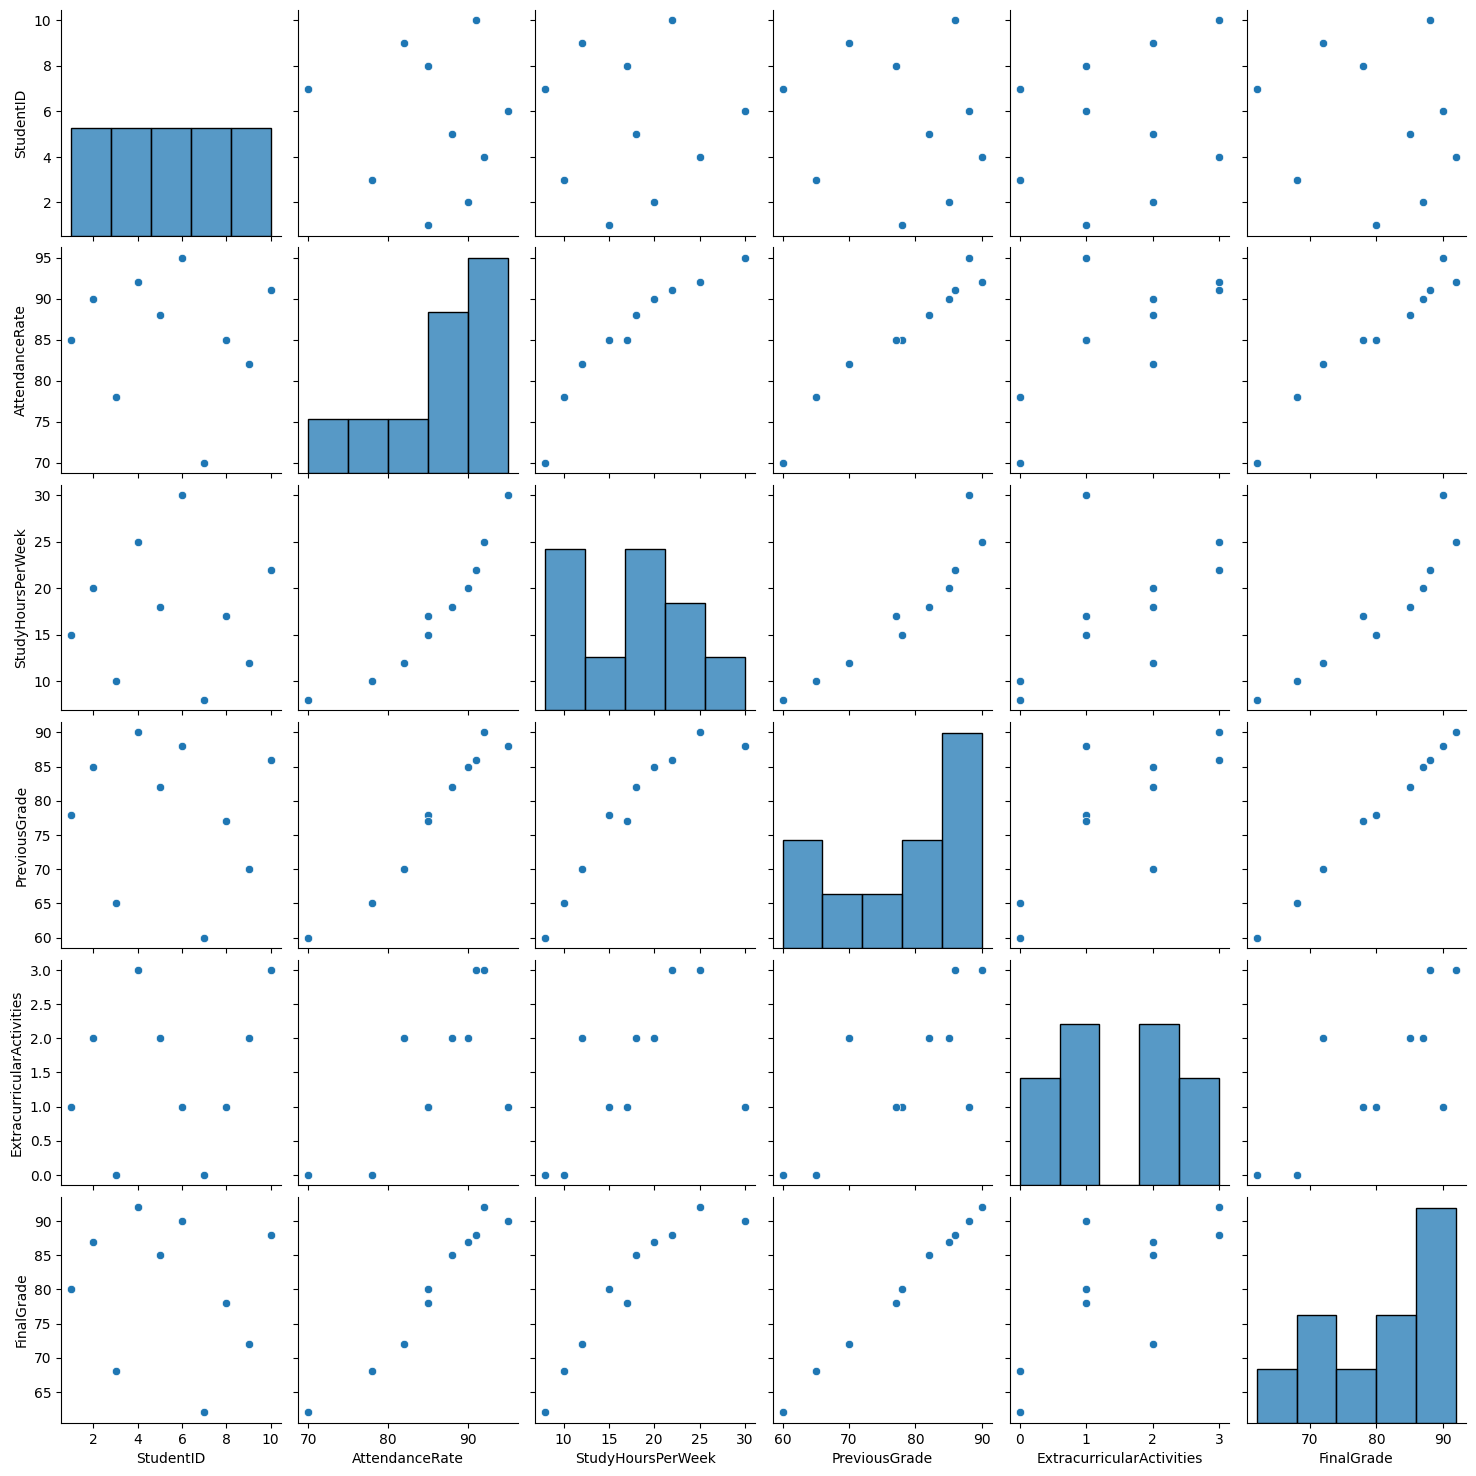

In [14]:
sns.pairplot(df)

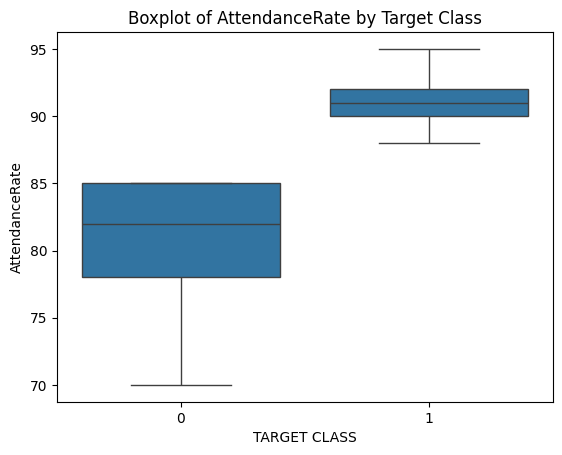

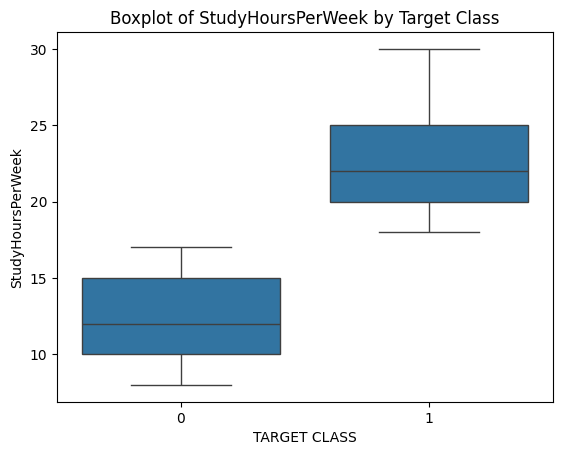

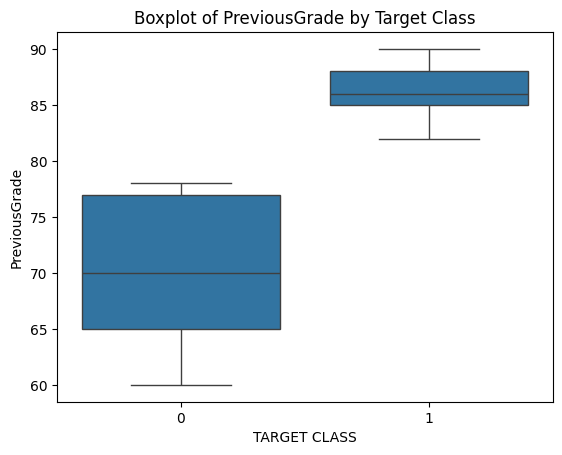

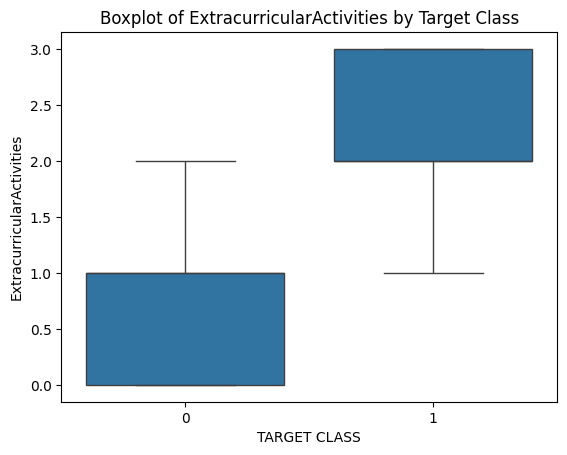

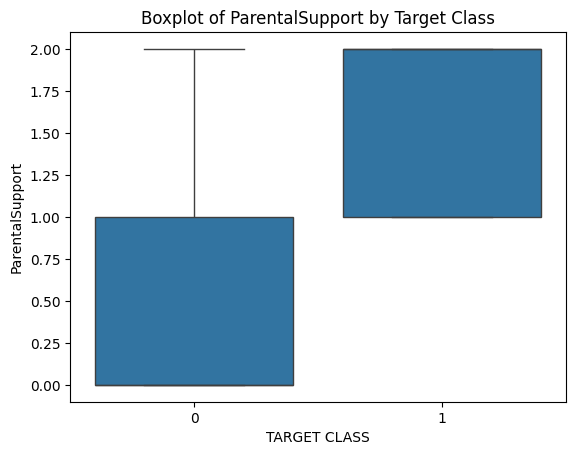

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of feature names
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport']

# Create a target variable (e.g., 1 if FinalGrade > 80, 0 otherwise)
df['TARGET CLASS'] = df['FinalGrade'].apply(lambda x: 1 if x > 80 else 0)

# Create a series of boxplots
for feature in features:
    sns.boxplot(x='TARGET CLASS', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target Class')
    plt.show()

 5. Scale the features using StandardScaler and transform the data

In [33]:
from sklearn.preprocessing import StandardScaler
X = df.drop('FinalGrade', axis=1)
y = df['FinalGrade']
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
X['ParentalSupport'] = X['ParentalSupport'].map({'Low': 0, 'Medium': 1, 'High': 2})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'Gender']])
X_scaled_df = pd.DataFrame(X_scaled, columns=['AttendanceRate_scaled', 'StudyHoursPerWeek_scaled', 'PreviousGrade_scaled', 'ExtracurricularActivities_scaled', 'ParentalSupport_scaled', 'Gender_scaled'])
X_scaled_df['StudentID'] = X['StudentID']
X_scaled_df['Name'] = X['Name']
X_scaled_df['FinalGrade'] = y

print(X_scaled_df.head())

   AttendanceRate_scaled  StudyHoursPerWeek_scaled  PreviousGrade_scaled  \
0              -0.084989                 -0.415581             -0.010365   
1               0.623252                  0.354014              0.715151   
2              -1.076526                 -1.185177             -1.357750   
3               0.906548                  1.123609              1.233376   
4               0.339956                  0.046176              0.404216   

   ExtracurricularActivities_scaled  ParentalSupport_scaled  Gender_scaled  \
0                          -0.48795                     NaN            NaN   
1                           0.48795                     NaN            NaN   
2                          -1.46385                     NaN            NaN   
3                           1.46385                     NaN            NaN   
4                           0.48795                     NaN            NaN   

   StudentID     Name  FinalGrade  
0          1     John          80  
1 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [61]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale the numeric columns
scaler.fit(df[numeric_cols])
scaled_features = scaler.transform(df[numeric_cols])

# Create a new DataFrame with the scaled features
df_feat = pd.DataFrame(scaled_features, columns=numeric_cols)

In [62]:
df_feat.head()

,StudentID,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,TARGET CLASS
0,-1.566699,-1.0,-0.084989,-0.415581,-0.010365,-0.48795,1.083473,-0.020879,-1.0
1,-1.218544,1.0,0.623252,0.354014,0.715151,0.48795,-0.120386,0.709876,1.0
2,-0.870388,-1.0,-1.076526,-1.185177,-1.357750,-1.46385,-1.324244,-1.273600,-1.0
3,-0.522233,-1.0,0.906548,1.123609,1.233376,1.46385,1.083473,1.231843,1.0
4,-0.174078,1.0,0.339956,0.046176,0.404216,0.48795,-0.120386,0.501089,1.0


 **Part 2 Model training and Fit the data to Model**

 1. Split the data generated from list created as X, Y is distributed using train test split
 function as X trainY trainX testY test

In [63]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30, random_state=101)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred = knn.predict(X_test)

# **Part 3 Evaluate the Classification Quality**
 1. Generate the confusion matrix to estimate the correction among features
 2. Generate the classi cation report using classification
 report

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [69]:
import numpy as np

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Generate the classification report
class_report = classification_report(y_test, pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [78]:
for i, error_rate in enumerate(error_rates, start=1):
    print("K Value:", i, "Error Rate:", error_rate)

K Value: 1 Error Rate: 0.0
K Value: 2 Error Rate: 0.0
K Value: 3 Error Rate: 0.3333333333333333
K Value: 4 Error Rate: 0.3333333333333333
K Value: 5 Error Rate: 1.0
K Value: 6 Error Rate: 1.0
K Value: 7 Error Rate: 1.0


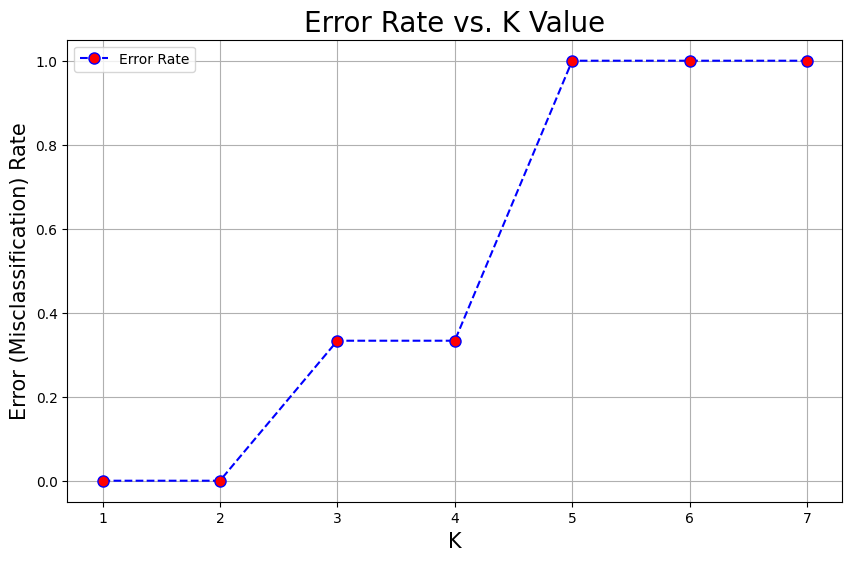

In [74]:
error_rates = []

# Will take some time
for k in range(1, len(X_train) + 1):
    if k <= len(X_train):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        error_rate = np.mean(predictions != y_test)
        error_rates.append(error_rate)
    else:
        break

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(error_rates) + 1), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error (Misclassification) Rate', fontsize=15)
plt.legend(['Error Rate'])
plt.grid(True)
plt.show()